# W07

In [1]:
import numpy as np
import matplotlib as plt
from matplotlib import pyplot as plt
import sklearn
from sklearn.mixture import GaussianMixture

In [2]:
data = np.load('/Users/lorenzaimpicicche/Desktop/astrostatistics_bicocca_2025/working/formationchannels.npy')
data

array([[17.12172682],
       [ 5.94121793],
       [ 6.35914124],
       ...,
       [34.34170191],
       [30.27018478],
       [25.93264098]], shape=(2950, 1))

(array([  1.,   0.,   1.,   1.,   1.,   0.,   2.,   3.,   2.,   1.,   4.,
          1.,   3.,   7.,   6.,  11.,   4.,  11.,   9.,  15.,  13.,   9.,
         11.,  19.,  19.,  11.,  16.,  17.,  19.,  12.,  14.,  14.,   9.,
         15.,  13.,   4.,  12.,  10.,   3.,   5.,   8.,  14.,  23.,  40.,
         72., 117., 145., 129., 104.,  51.,  38.,  26.,  48.,  44.,  47.,
         47.,  51.,  73.,  59.,  80.,  69.,  75.,  78.,  85.,  82.,  88.,
         86.,  84.,  80.,  71.,  87.,  58.,  57.,  65.,  49.,  48.,  32.,
         33.,  32.,  26.,  34.,  17.,  15.,  14.,  11.,  12.,   2.,   6.,
          0.,   1.,   2.,   2.,   2.,   0.,   1.,   0.,   0.,   1.,   0.,
          1.]),
 array([-4.965425  , -4.42875831, -3.89209161, -3.35542492, -2.81875822,
        -2.28209152, -1.74542483, -1.20875813, -0.67209144, -0.13542474,
         0.40124195,  0.93790865,  1.47457534,  2.01124204,  2.54790873,
         3.08457543,  3.62124212,  4.15790882,  4.69457551,  5.23124221,
         5.7679089 ,  6.30

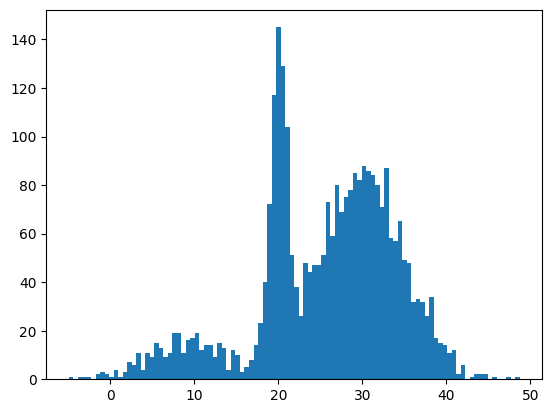

In [3]:
plt.hist(data, bins=100)

In [5]:
gm = GaussianMixture(n_components=3, random_state=0).fit(data)

In [10]:
x = np.linspace(min(data), max(data), 1000).reshape(-1, 1) #reshape perché sklearn deve avere x 2D

gm_log = gm.score(data) #score:solo un punto, score_samples: per ogni punto
print(gm_log)

gm_pdf = np.exp(gm.score_samples(x)) # exp(log(p(x))))
print(gm_pdf)

-3.401238839882898
[1.06743271e-04 1.10499018e-04 1.14371767e-04 1.18364575e-04
 1.22480557e-04 1.26722889e-04 1.31094803e-04 1.35599593e-04
 1.40240612e-04 1.45021272e-04 1.49945045e-04 1.55015466e-04
 1.60236127e-04 1.65610684e-04 1.71142850e-04 1.76836402e-04
 1.82695176e-04 1.88723068e-04 1.94924037e-04 2.01302100e-04
 2.07861336e-04 2.14605883e-04 2.21539939e-04 2.28667762e-04
 2.35993667e-04 2.43522031e-04 2.51257286e-04 2.59203924e-04
 2.67366493e-04 2.75749597e-04 2.84357897e-04 2.93196108e-04
 3.02268999e-04 3.11581393e-04 3.21138164e-04 3.30944240e-04
 3.41004596e-04 3.51324259e-04 3.61908301e-04 3.72761843e-04
 3.83890049e-04 3.95298131e-04 4.06991337e-04 4.18974962e-04
 4.31254337e-04 4.43834829e-04 4.56721845e-04 4.69920822e-04
 4.83437230e-04 4.97276569e-04 5.11444368e-04 5.25946179e-04
 5.40787579e-04 5.55974165e-04 5.71511553e-04 5.87405377e-04
 6.03661280e-04 6.20284920e-04 6.37281962e-04 6.54658074e-04
 6.72418929e-04 6.90570199e-04 7.09117552e-04 7.28066648e-04
 7.47

Text(0, 0.5, 'Densità')

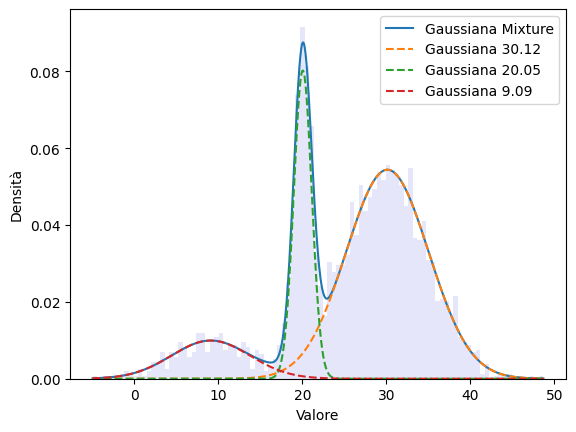

In [20]:
plt.plot(x, gm_pdf, label='Gaussian Mixture')

for mean, cov, weight in zip(gm.means_.flatten(), gm.covariances_.flatten(), gm.weights_):
    
    singola_gauss = weight * np.exp(-0.5 * ((x - mean) ** 2) / cov) / np.sqrt(2 * np.pi * cov)
    
    plt.plot(x, singola_gauss, linestyle="dashed", label=f'Gaussiana {mean:.2f}')

    
plt.hist(data, bins=100, density=True, color='lavender') #così i conteggi sono confrontabili con la densità di probabilità (normalizzata)
plt.legend()
plt.xlabel('Valore')
plt.ylabel('Densità')

## N vs AIC

Text(0, 0.5, 'AIC')

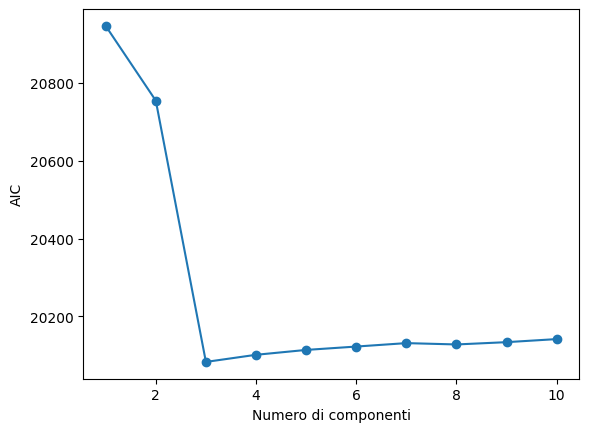

In [39]:
aic = []
modelli = []

for i in range(1,11):
    gm = GaussianMixture(n_components=i, random_state=0).fit(data.reshape(-1,1))
    modelli.append(gm)
    
    aic_i = gm.aic(data.reshape(-1,1))
    aic.append(aic_i)
    

plt.plot(range(1,11), aic, marker='o')
plt.xlabel('Numero di componenti')
plt.ylabel('AIC')

**Modello migliore**

Text(0, 0.5, 'Densità')

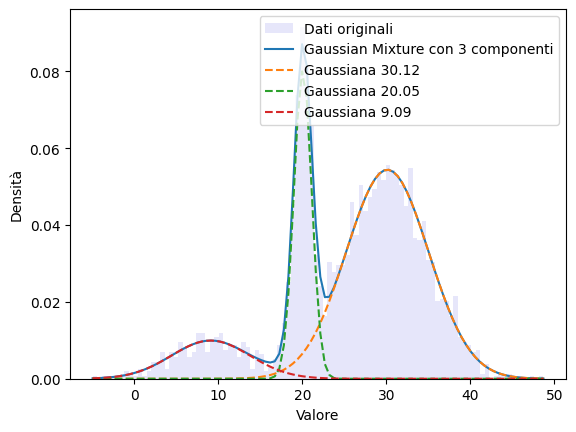

In [44]:
mm_i = np.argmin(aic)
mm = modelli[mm_i]


plt.hist(data, bins=100, density=True, color='Lavender', label='Dati originali')

x = np.linspace(min(data), max(data), 100).reshape(-1, 1)
gm_pdf = np.exp(best_model.score_samples(x))

plt.plot(x, gm_pdf, label=f'Gaussian Mixture con {best_model.n_components} componenti')

for mean, cov, weight in zip(best_model.means_.flatten(), best_model.covariances_.flatten(), best_model.weights_):
    
    singola_gauss = weight * np.exp(-0.5 * ((x - mean) ** 2) / cov) / np.sqrt(2 * np.pi * cov)
    plt.plot(x, singola_gauss, linestyle="dashed", label=f'Gaussiana {mean:.2f}')

plt.legend()
plt.xlabel('Valore')
plt.ylabel('Densità')